In [1]:
# Data Manipulation and Visualization 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly_express as px

#Hide API Key 
import creds

# setting theme style and seaborn Palette 
sns.set_theme(context = 'notebook', style='darkgrid', palette='muted')


from fredapi import Fred


# 1. Create a Fred Object

In [2]:
fred = Fred(api_key=creds.fred_key)

In [5]:
# Search for economic data on Fred

sp_search = fred.search('S&P', order_by='popularity')

In [7]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-10,2023-11-10,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-10 08:38:02-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-10,2023-11-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-10,2023-11-10,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-10 08:38:09-06:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-10,2023-11-10,S&P 500,2013-11-11,2023-11-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-09 19:10:57-06:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-10,2023-11-10,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

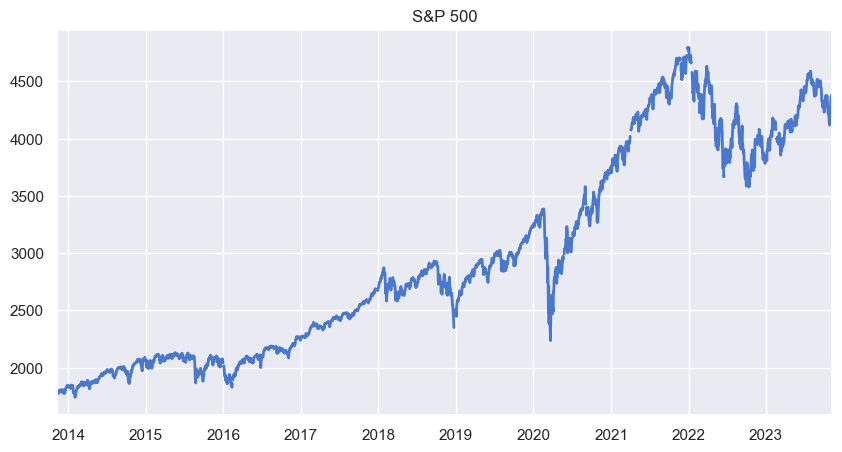

In [14]:
# Pull Raw Data 

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)
